In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Pulizia e analisi preliminare del file riguardante la **composizione demografica** dei clienti di **TheLook eCommerce**.

In [2]:
dc = pd.read_csv('demographic_composition.csv')
dc

,user_id,gender,age,state,city,country,latitude,longitude,traffic_source,num_orders,avg_items_per_order
0,41110,F,49,Acre,Rio Branco,Brasil,-9.945568,-67.835610,Search,4,1.25
1,43685,F,13,Acre,Rio Branco,Brasil,-9.945568,-67.835610,Search,1,1.00
2,75218,F,65,Acre,Rio Branco,Brasil,-9.945568,-67.835610,Search,0,NaN
3,82190,M,57,Acre,Rio Branco,Brasil,-9.945568,-67.835610,Organic,0,NaN
4,83792,M,34,Acre,Rio Branco,Brasil,-9.945568,-67.835610,Search,1,3.00
...,...,...,...,...,...,...,...,...,...,...,...
99995,27804,F,41,Jeju Special Self-Governing Province,Seogwipo City,South Korea,33.305744,126.675429,Search,1,1.00
99996,40781,F,45,Jeju Special Self-Governing Province,Seogwipo City,South Korea,33.305744,126.675429,Organic,1,1.00
99997,50723,F,40,Jeju Special Self-Governing Province,Seogwipo City,South Korea,33.305744,126.675429,Search,1,1.00
99998,63116,F,24,Jeju Special Self-Governing Province,Seogwipo City,South Korea,33.305744,126.675429,Search,1,1.00


In [3]:
dc.dtypes

user_id                  int64
gender                  object
age                      int64
state                   object
city                    object
country                 object
latitude               float64
longitude              float64
traffic_source          object
num_orders               int64
avg_items_per_order    float64
dtype: object

In [4]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              100000 non-null  int64  
 1   gender               100000 non-null  object 
 2   age                  100000 non-null  int64  
 3   state                100000 non-null  object 
 4   city                 99019 non-null   object 
 5   country              100000 non-null  object 
 6   latitude             100000 non-null  float64
 7   longitude            100000 non-null  float64
 8   traffic_source       100000 non-null  object 
 9   num_orders           100000 non-null  int64  
 10  avg_items_per_order  79920 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 8.4+ MB


In [5]:
# Sostituisco i valori 'null' nell colonna 'City' con 'Unknown'

dc['city'].fillna('Unknown', inplace=True)

In [6]:
righe_con_unknown = dc[dc['city'] == 'Unknown']
righe_con_unknown

,user_id,gender,age,state,city,country,latitude,longitude,traffic_source,num_orders,avg_items_per_order
24,972,F,47,Acre,Unknown,Brasil,-8.065346,-72.870949,Search,3,2.0
25,2792,M,42,Acre,Unknown,Brasil,-8.065346,-72.870949,Search,1,2.0
26,23106,F,33,Acre,Unknown,Brasil,-8.065346,-72.870949,Organic,2,2.5
27,30737,F,59,Acre,Unknown,Brasil,-8.065346,-72.870949,Facebook,0,NaN
28,48216,F,15,Acre,Unknown,Brasil,-8.065346,-72.870949,Search,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
95976,36151,F,26,Comunidad Valenciana,Unknown,Spain,39.478079,-0.557213,Search,1,1.0
96068,27311,F,38,Comunidad Valenciana,Unknown,Spain,39.513440,-0.455715,Search,1,1.0
96069,38936,M,69,Comunidad Valenciana,Unknown,Spain,39.513440,-0.455715,Search,2,2.0
96070,50409,F,19,Comunidad Valenciana,Unknown,Spain,39.513440,-0.455715,Search,2,1.0


In [7]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              100000 non-null  int64  
 1   gender               100000 non-null  object 
 2   age                  100000 non-null  int64  
 3   state                100000 non-null  object 
 4   city                 100000 non-null  object 
 5   country              100000 non-null  object 
 6   latitude             100000 non-null  float64
 7   longitude            100000 non-null  float64
 8   traffic_source       100000 non-null  object 
 9   num_orders           100000 non-null  int64  
 10  avg_items_per_order  79920 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 8.4+ MB


In [8]:
# Numero di clienti maschi e femmine distinti

gender_counts = dc['gender'].value_counts()

print("Numero di clienti maschi:", gender_counts['M'])
print("Numero di clienti femmine:", gender_counts['F'])

Numero di clienti maschi: 49826
Numero di clienti femmine: 50174


Text(0.5, 1.0, 'Distribuzione di genere')

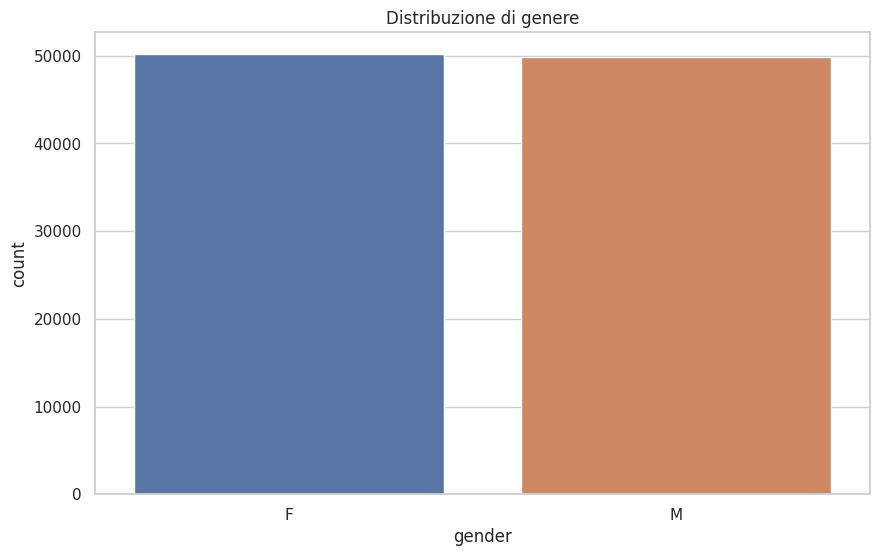

In [9]:
# Plot Distribuzione del Genere (M,F)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=dc)
plt.title('Distribuzione di genere')

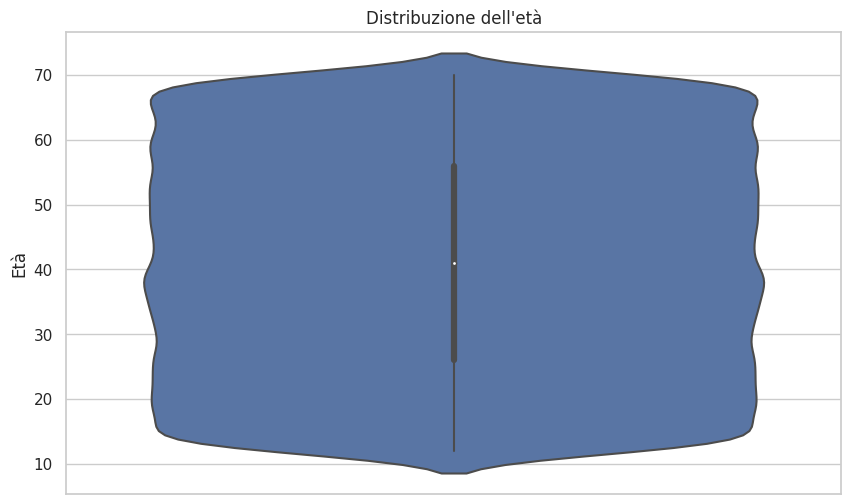

In [10]:
# Violin Plot per Distribuzione dell'Età

plt.figure(figsize=(10, 6))
sns.violinplot(y='age', data=dc)
plt.title('Distribuzione dell\'età')
plt.ylabel('Età')
plt.show()

In [11]:
# Numero di ordini per genere

result_df = dc.groupby('gender')['num_orders'].sum().reset_index()
result_df

,gender,num_orders
0,F,62890
1,M,62114


In [12]:
# Numero di clienti per country (top 5)

top_5_countries = dc['country'].value_counts().head(5)
top_5_countries

China             33970
United States     22349
Brasil            14664
South Korea        5258
United Kingdom     4683
Name: country, dtype: int64

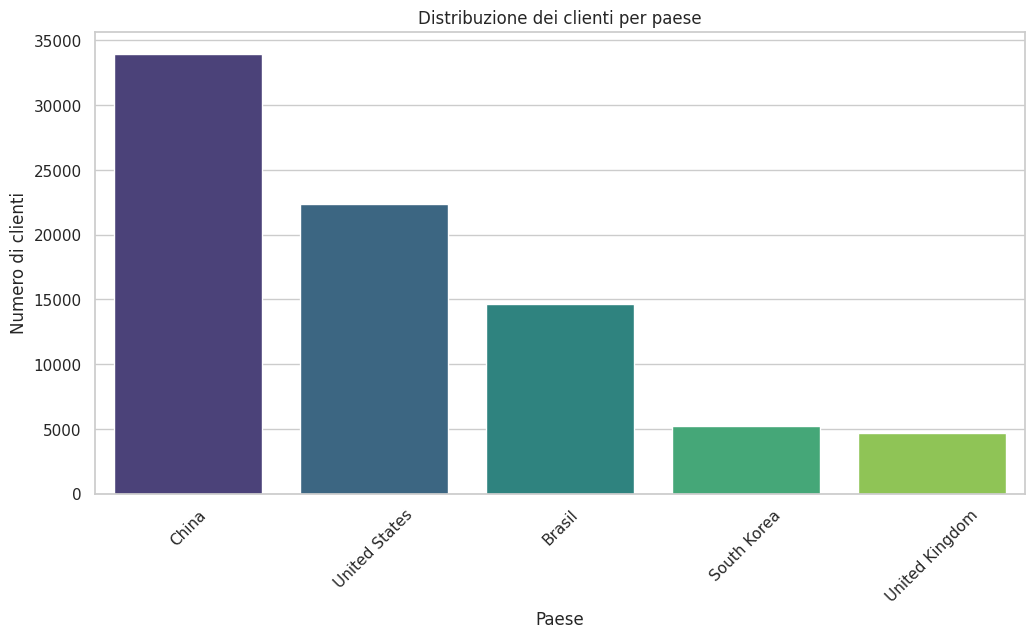

In [13]:
# Plot Distribuzione dei Clienti per Paese (Top 5)

plt.figure(figsize=(12, 6))
sns.countplot(x='country', data=dc, palette='viridis', order=dc['country'].value_counts().head(5).index)
plt.title('Distribuzione dei clienti per paese')
plt.xlabel('Paese')
plt.ylabel('Numero di clienti')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Check sulla colonna 'Country'

dc['country'].unique()

array(['Brasil', 'Japan', 'United States', 'China', 'South Korea',
       'Spain', 'France', 'United Kingdom', 'Germany', 'Colombia',
       'Belgium', 'Poland', 'Australia', 'Austria'], dtype=object)

In [15]:
# Sistemo le righe con 'Espana' nella colonna country rimpiazzandole con 'Spain'

dc['country'].replace('España', 'Spain', inplace=True)

In [16]:
# Numero di clienti per city (top 3)

dc['city'].value_counts().head(3)

Shanghai    2495
Beijing     2047
Seoul       1477
Name: city, dtype: int64

In [18]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              100000 non-null  int64  
 1   gender               100000 non-null  object 
 2   age                  100000 non-null  int64  
 3   state                100000 non-null  object 
 4   city                 100000 non-null  object 
 5   country              100000 non-null  object 
 6   latitude             100000 non-null  float64
 7   longitude            100000 non-null  float64
 8   traffic_source       100000 non-null  object 
 9   num_orders           100000 non-null  int64  
 10  avg_items_per_order  79920 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 8.4+ MB


In [19]:
dc.to_csv('demographic_composition_cleaned2.csv')

In [20]:
# EXTRA (lavoro sulla colonna 'state' correggendo alcuni errori che ho riscontrato nel file)

dc['state'].unique()

array(['Acre', 'Gifu', 'Iowa', 'Nara', 'Ohio', 'Oita', 'Utah', 'Aichi',
       'Akita', 'Anhui', 'Bahia', 'Busan', 'Ceuta', 'Chiba', 'Corse',
       'Gunma', 'Hebei', 'Henan', 'Hubei', 'Hunan', 'Hyogo', 'Idaho',
       'Iwate', 'Jilin', 'Kochi', 'Kyoto', 'Maine', 'Osaka', 'Pará',
       'Seoul', 'Shiga', 'Texas', 'Tokyo', 'Wales', 'Alaska', 'Amapá',
       'Aomori', 'Bayern', 'Berlin', 'Bremen', 'Ceará', 'Fujian', 'Goiás',
       'Hainan', 'Hawaii', 'Hessen', 'Kagawa', 'Kansas', 'Miyagi',
       'Nagano', 'Nevada', 'Oregon', 'Piauí', 'Shanxi', 'Yunnan',
       'Alabama', 'Alagoas', 'Aragón', 'Arizona', 'Beijing', 'Daejeon',
       'England', 'Florida', 'Fukuoka', 'Galicia', 'Georgia', 'Guizhou',
       'Gwangju', 'Hamburg', 'Ibaraki', 'Indiana', 'Jiangsu', 'Jiangxi',
       'Melilla', 'Montana', 'Navarra', 'Okayama', 'Okinawa', 'Paraná',
       'Qinghai', 'Roraima', 'Sachsen', 'Saitama', 'Sergipe', 'Shaanxi',
       'Sichuan', 'Tianjin', 'Tochigi', 'Vermont', 'Wyoming', 'Amazonas',
   

Gli 'state' che presentano delle discrepanze per quanto riguarda city e country sono: **Bagmati Region** e **Remote Territory**.

Bagmati Region e Remote Territory, facendo un check sulle coordinate geografiche su Maps, sono regioni del Nepal e non della Cina.

Data la poca significatività del campione abbiamo deciso di non considerarli nel file finale e quindi di non modificare i valori per questi 'state'.

Lascio comunque il codice qui sotto che mostra come sistemare l'errore.

In [23]:
bagmati_region = dc[dc['state'] == 'Bagmati region']
bagmati_region

,user_id,gender,age,state,city,country,latitude,longitude,traffic_source,num_orders,avg_items_per_order
83382,1947,M,13,Bagmati region,Gaurishankar,Nepal,27.774036,86.2042,Organic,1,3.0
83383,3596,M,56,Bagmati region,Gaurishankar,Nepal,27.774036,86.2042,Search,1,3.0
83384,4589,M,55,Bagmati region,Gaurishankar,Nepal,27.774036,86.2042,Search,0,NaN
83385,20942,M,51,Bagmati region,Gaurishankar,Nepal,27.774036,86.2042,Email,0,NaN
83386,24815,M,49,Bagmati region,Gaurishankar,Nepal,27.774036,86.2042,Organic,0,NaN
83387,26796,F,27,Bagmati region,Gaurishankar,Nepal,27.774036,86.2042,Search,1,1.0
83388,29364,M,12,Bagmati region,Gaurishankar,Nepal,27.774036,86.2042,Email,0,NaN
83389,30077,F,28,Bagmati region,Gaurishankar,Nepal,27.774036,86.2042,Search,0,NaN
83390,34257,M,38,Bagmati region,Gaurishankar,Nepal,27.774036,86.2042,Facebook,1,1.0
83391,36141,F,41,Bagmati region,Gaurishankar,Nepal,27.774036,86.2042,Search,1,2.0


In [22]:
# Modifico city e country per Bagmati region

condizione = dc['state'] == 'Bagmati region'
dc.loc[condizione, 'city'] = dc.loc[condizione, 'city'].replace('Beijing', 'Gaurishankar')
dc.loc[condizione, 'country'] = dc.loc[condizione, 'country'].replace('China', 'Nepal')

In [26]:
remote_territory = dc[dc['state'] == 'Remote territory']
remote_territory

,user_id,gender,age,state,city,country,latitude,longitude,traffic_source,num_orders,avg_items_per_order
90440,9747,F,47,Remote territory,Surma,Nepal,29.714174,81.172431,Search,2,1.00
90441,19687,M,61,Remote territory,Surma,Nepal,29.714174,81.172431,Search,1,1.00
90442,23131,M,58,Remote territory,Surma,Nepal,29.714174,81.172431,Search,2,1.50
90443,25717,M,59,Remote territory,Surma,Nepal,29.714174,81.172431,Search,0,NaN
90444,26955,M,33,Remote territory,Surma,Nepal,29.714174,81.172431,Search,1,2.00
90445,32582,F,54,Remote territory,Surma,Nepal,29.714174,81.172431,Organic,2,2.00
90446,34000,M,52,Remote territory,Surma,Nepal,29.714174,81.172431,Search,1,1.00
90447,39053,F,19,Remote territory,Surma,Nepal,29.714174,81.172431,Search,1,1.00
90448,39814,F,57,Remote territory,Surma,Nepal,29.714174,81.172431,Search,1,1.00
90449,48617,F,39,Remote territory,Surma,Nepal,29.714174,81.172431,Email,0,NaN


In [25]:
# Modifico city e country per Remote territory

condizione = dc['state'] == 'Remote territory'
dc.loc[condizione, 'city'] = dc.loc[condizione, 'city'].replace('Beijing', 'Surma')
dc.loc[condizione, 'country'] = dc.loc[condizione, 'country'].replace('China', 'Nepal')